# 미션3 머신러닝 데이터 분석

## 목차

- 데이터 불러오기
- 데이터 전처리
- 데이터 분석
- 모델링
- 분석결과 및 방안

## 분석 목표

- 자전거 대여 패턴 분석
- 시간대별 대여 패턴 분석
- 평일/주말 별 대여 패턴 분석
- column 별 이상치 확인 및 처리
- 전처리시 다양한 상황 분석 및 예측

## 미션 목표 RMSLE를 최대한 낮추는 것

- 예측 값과 실제 값의 차이를 로그변환 하여 계산 후 그 차이릐 제곱 평균의 제곱근을 구한 값
- 큰 값보다 작은 값의 오차를 더 중요시하는 경우에 유용함

---

### 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/스터디/data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/스터디/data/test.csv')

In [ ]:
import seaborn as sns
import numpy as np

In [ ]:
# matplotib에서 한글폰트 깨짐 현상에 대한 코딩
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
test_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [ ]:
train_df.shape

(10886, 12)

In [ ]:
test_df.shape

(6493, 9)

---
- test 데이터에서 'casual', 'registered', 'count' 컬럼 누락된 것을 확인
---

In [ ]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
test_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


---
- datetime 이 object 타입인것으로 확인 할수 있고 나머지는 정수형/실수형인것을 알수 있다.

- 이후 datetime은 변환 하자~!
---


| 컬럼명      | 데이터 타입 | 설명                                                                 |
|-------------|-------------|----------------------------------------------------------------------|
| datetime    | datetime    | 자전거 대여 기록의 날짜 및 시간. 예시: 2011-01-01 00:00:00             |
| season      | int         | 계절 (1: 봄, 2: 여름, 3: 가을, 4: 겨울)                              |
| holiday     | int         | 공휴일 여부 (0: 평일, 1: 공휴일)                                     |
| workingday  | int         | 근무일 여부 (0: 주말/공휴일, 1: 근무일)                              |
| weather     | int         | 날씨 상황 (1: 맑음, 2: 구름낌/안개, 3: 약간의 비/눈, 4: 폭우/폭설)     |
| temp        | float       | 실측 온도 (섭씨)                                                     |
| atemp       | float       | 체감 온도 (섭씨)                                                     |
| humidity    | int         | 습도 (%)                                                             |
| windspeed   | float       | 풍속 (m/s)                                                           |
| casual      | int         | 등록되지 않은 사용자의 대여 수 (train.csv에만 있음)                                       |
| registered  | int         | 등록된 사용자의 대여 수 (train.csv에만 있음)                                              |
| count       | int         | 총 대여 수 (**종속 변수**) (train.csv에만 있음)                                           |

--------

### 데이터 전처리

In [ ]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
train_df.describe(include="object")

,datetime
count,10886
unique,10886
top,2012-12-19 23:00:00
freq,1


In [ ]:
test_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [ ]:
test_df.describe(include="object")

,datetime
count,6493
unique,6493
top,2012-12-31 23:00:00
freq,1


--------
- 테스트 데이터라 살펴볼 필요 없나? 그래도 우선 확인 3개의 컬럼 빠져있는것 확인됨
--------

In [ ]:
train_df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


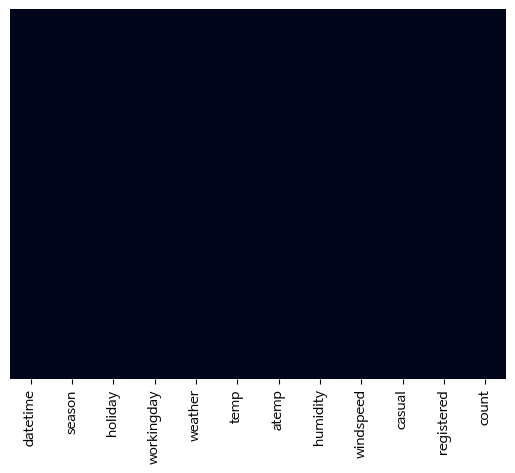

In [ ]:
sns.heatmap(train_df.isnull(), cbar=False, yticklabels=False)
plt.show()

--------
- 결측치 확인 되지 않음
--------

In [ ]:
train_df.duplicated().sum()

np.int64(0)

---
- 중복값 확인 되지 않음
---

In [ ]:
outliers = train_df[train_df['windspeed'] > 20]
outliers['windspeed']

,windspeed
41,22.0028
42,30.0026
43,23.9994
44,22.0028
47,23.9994
...,...
10857,26.0027
10878,23.9994
10879,26.0027
10880,23.9994


#### datetime 변수 나누기

In [ ]:
def preprocess_datetime(df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df["weekday_name"] = df["datetime"].dt.day_name()
    df["weekday_num"] = df["datetime"].dt.weekday
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    return df

In [ ]:
train_df = preprocess_datetime(train_df)
test_df = preprocess_datetime(test_df)

In [ ]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday_name,weekday_num,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday,5,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday,5,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday,5,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday,5,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday,5,2011,1,1,4


#### 계절 오류 정리

In [ ]:
def corr_season(month):
    if month in [3, 4, 5]:
        return 1
    elif month in [6, 7, 8]:
        return 2
    elif month in [9, 10, 11]:
        return 3
    else:
        return 4

train_df['season'] = train_df['month'].apply(corr_season)
test_df['season'] = test_df['month'].apply(corr_season)

In [ ]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday_name,weekday_num,year,month,day,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday,5,2011,1,1,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday,5,2011,1,1,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday,5,2011,1,1,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday,5,2011,1,1,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday,5,2011,1,1,4


#### 이상치 의심 컬럼

- windspeed

|강도 | 초속 | 설명 |
| :--- | :--- | :--- |
| | 17~25 m/s | 간판이 떨어져 날아감 |
| | 25~33 m/s | 지붕이나 기왓장이 날아감, 가로수도 뽑힐 수 있음 |
| | 33~44 m/s | 기차가 탈선할 수 있음 |
| | 44~54 m/s | 사람이나 바위가 날아갈 정도, 달리는 자동차 전복 가능 |
| | 54 m/s~ | 건물 붕괴 등 모든 재난 발생 가능 |

--------------------------

- 20 m/s 이상의 데이터는 이상치로 보고 평균값을 대체 한다.

---

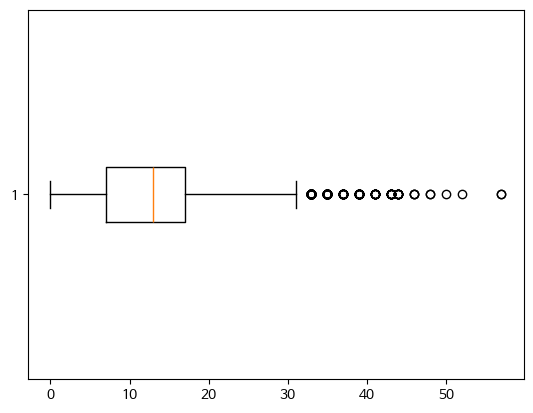

In [ ]:
plt.boxplot(train_df['windspeed'], vert=False)
plt.show()

In [ ]:
train_df['windspeed'].describe()

,windspeed
count,10886.000000
mean,12.799395
std,8.164537
min,0.000000
25%,7.001500
50%,12.998000
75%,16.997900
max,56.996900


In [ ]:
np.sort(train_df['windspeed'].unique())

array([ 0.    ,  6.0032,  7.0015,  8.9981, 11.0014, 12.998 , 15.0013,
       16.9979, 19.0012, 19.9995, 22.0028, 23.9994, 26.0027, 27.9993,
       30.0026, 31.0009, 32.9975, 35.0008, 36.9974, 39.0007, 40.9973,
       43.0006, 43.9989, 46.0022, 47.9988, 50.0021, 51.9987, 56.9969])

In [ ]:
train_df[train_df['windspeed']>=20]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday_name,weekday_num,year,month,day,hour
41,2011-01-02 18:00:00,4,0,0,2,14.76,16.665,46,22.0028,10,43,53,Sunday,6,2011,1,2,18
42,2011-01-02 19:00:00,4,0,0,1,13.12,14.395,42,30.0026,1,29,30,Sunday,6,2011,1,2,19
43,2011-01-02 20:00:00,4,0,0,1,12.30,13.635,39,23.9994,5,17,22,Sunday,6,2011,1,2,20
44,2011-01-02 21:00:00,4,0,0,1,10.66,11.365,44,22.0028,11,20,31,Sunday,6,2011,1,2,21
47,2011-01-03 00:00:00,4,0,1,1,9.02,9.850,44,23.9994,0,5,5,Monday,0,2011,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10857,2012-12-18 19:00:00,4,0,1,1,15.58,19.695,46,26.0027,19,334,353,Tuesday,1,2012,12,18,19
10878,2012-12-19 16:00:00,4,0,1,1,17.22,21.210,50,23.9994,37,297,334,Wednesday,2,2012,12,19,16
10879,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562,Wednesday,2,2012,12,19,17
10880,2012-12-19 18:00:00,4,0,1,1,15.58,19.695,50,23.9994,23,546,569,Wednesday,2,2012,12,19,18


In [ ]:
train_df[train_df['windspeed'] >= 20]['count'].sum()/train_df['count'].sum()

np.float64(0.14877322970870918)

---
14%정도의 데이터가 20m/s 이상이다.

---

In [ ]:
# 이상치 평균으로 대체

wind_mean = round(train_df[train_df['windspeed'] <= 20]['windspeed'].mean(),4)
train_df.loc[train_df['windspeed'] >= 20, 'windspeed'] = wind_mean

In [ ]:
np.sort(train_df['windspeed'].unique())

array([ 0.    ,  6.0032,  7.0015,  8.9981, 10.5241, 11.0014, 12.998 ,
       15.0013, 16.9979, 19.0012, 19.9995])

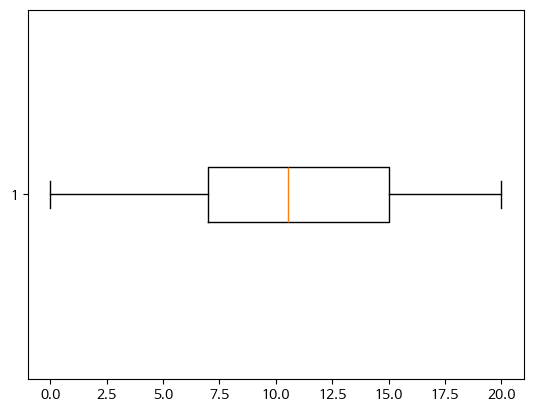

In [ ]:
plt.boxplot(train_df['windspeed'], vert=False)
plt.show()

---
### 데이터 분석
---

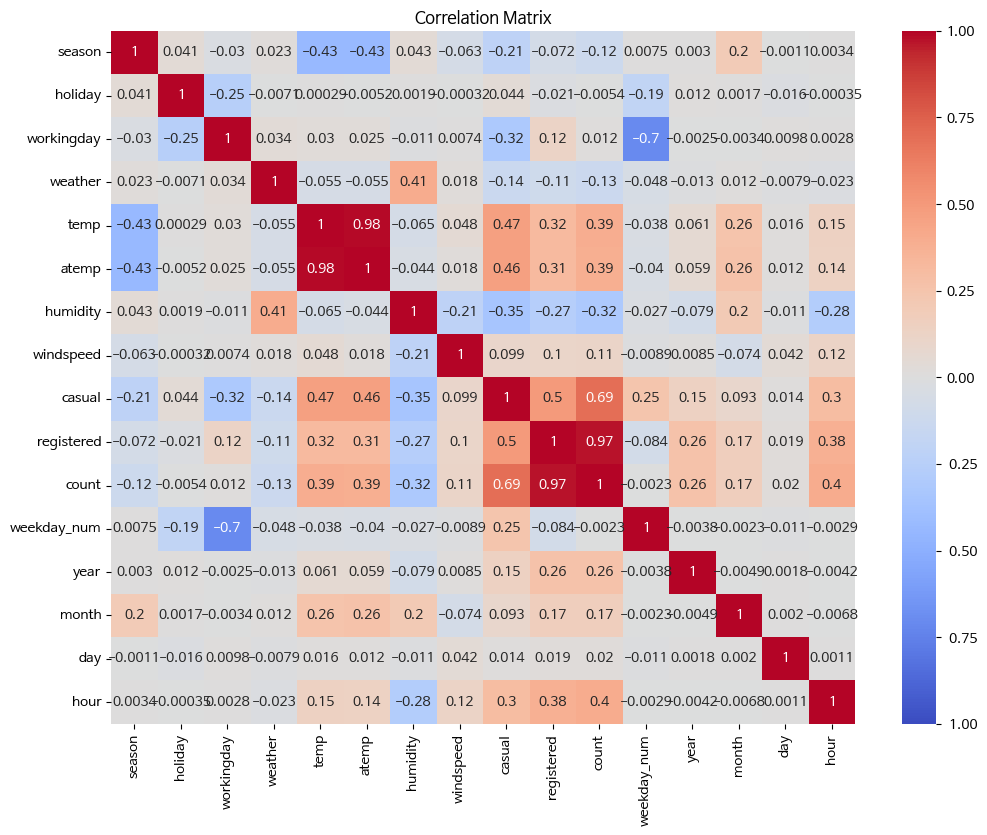

In [ ]:
corr = train_df.select_dtypes(include='number').corr()

plt.figure(figsize=(12,9))
correlation_matrix = corr
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, center=0, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

---
상관관계 분석 결과

 - temp/atemp는 0.98이라는 높은 상관계수를 가지고 있음 온도가 높을 수록 체감온도도 높다는 것이 확인됨
 - count 와 humidity 는 -0.32의 상관계수가 확인되는데, 이는 습도가 높아질수록 자전거 대여량이 줄어든다고 확인 할수 있다.
 - 종속변수 count와 가장 높은 상관계수는 hour로  

---
### 변수별 대여량 다각도 시각화
---

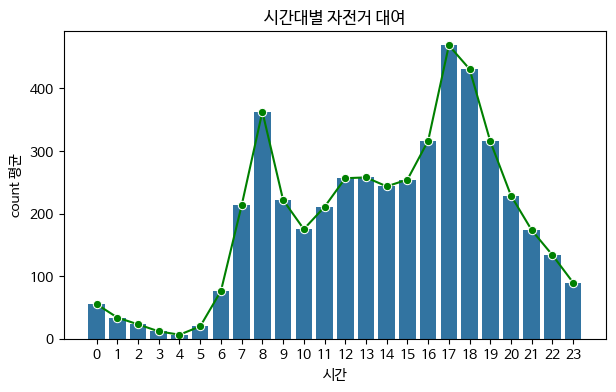

In [ ]:
# 시간대별 자전거 대여량 - 평균

plt.figure(figsize=(7,4))

sns.barplot(data=train_df, x="hour", y="count", ci=None)

# 선 넣고 싶어 추가
hourly_avg = train_df.groupby("hour")["count"].mean().reset_index()  #.groupby()를 하면 그룹핑 기준 컬럼이 인덱스로 설정되기 때문에 .reset_index() 필요
sns.lineplot(data=hourly_avg, x="hour", y="count", color="green", marker="o")

plt.title("시간대별 자전거 대여")
plt.xlabel("시간")
plt.ylabel("count 평균")
plt.show()

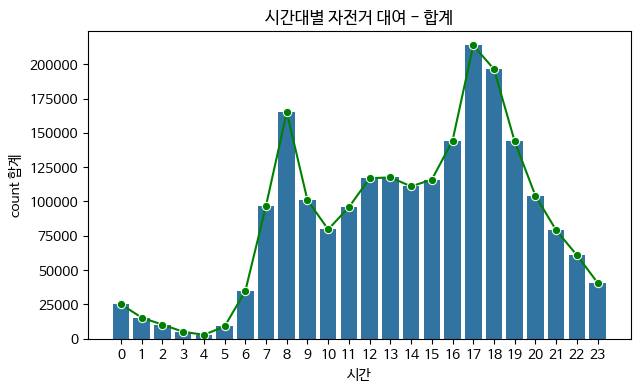

In [ ]:
# 시간대별 자전거 대여량 - 합계

plt.figure(figsize=(7,4))

sns.barplot(data=train_df, x="hour", y="count", ci=None, estimator=np.sum)    # estimator=np.sum을 통해 합계로 지정

# 선 넣고 싶어 추가
hourly_avg = train_df.groupby("hour")["count"].sum().reset_index()  #.groupby()를 하면 그룹핑 기준 컬럼이 인덱스로 설정되기 때문에 .reset_index() 필요
sns.lineplot(data=hourly_avg, x="hour", y="count", estimator=np.sum, color="green", marker="o")

plt.title("시간대별 자전거 대여 - 합계")
plt.xlabel("시간")
plt.ylabel("count 합계")
plt.show()

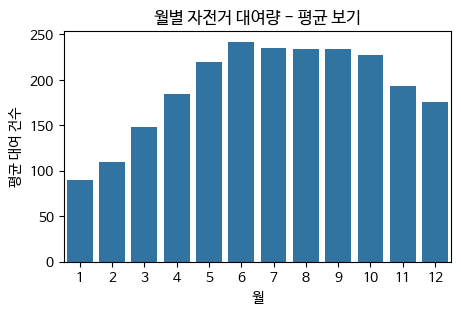

In [ ]:
# 월별 자전거 대여량 - 평균 기준

plt.figure(figsize=(5,3))
sns.barplot(data=train_df, x="month", y="count", ci=None)           # count의 각 그룹 평균을 내서 계산 (디폴트)
plt.title("월별 자전거 대여량 - 평균 보기")
plt.xlabel("월")
plt.ylabel("평균 대여 건수")
plt.show()

In [ ]:
# 습도 구간화
bins = [0, 30, 60, train_df['humidity'].max()]                                                         # 저습도, 중간 습도, 고습도
labels = ['Low', 'Medium', 'High']
train_df['humidity_bin'] = pd.cut(train_df['humidity'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
# 구간별 대여량 평균
humidity_analysis = train_df.groupby('humidity_bin')['count'].mean().reset_index()
humidity_analysis

,humidity_bin,count
0,Low,280.487805
1,Medium,236.836306
2,High,146.371745


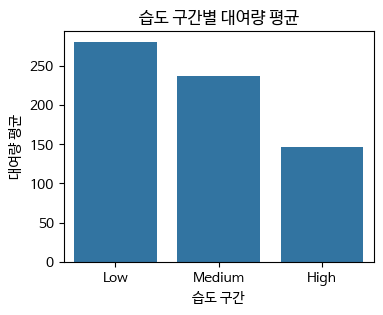

In [ ]:
# 습도 구간별 대여량 시각화 - 평균 기준

plt.figure(figsize=(4,3))
sns.barplot(data=humidity_analysis, x='humidity_bin', y='count')
plt.title('습도 구간별 대여량 평균')
plt.xlabel('습도 구간')
plt.ylabel('대여량 평균')
plt.show()

## 모델링


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.pipeline import make_pipeline                                                              # 다항 회귀시 오류때문에 필요
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
from sklearn.preprocessing import StandardScaler

In [ ]:
X = train_df.drop(columns='count')
y = train_df['count']

In [ ]:
X = train_df.drop(columns=['count', 'casual', 'registered', 'datetime'])
y = train_df['count']

In [ ]:
X_test = test_df.drop(columns=['datetime'])

In [ ]:
print(f'Train data shape: {X.shape}')
print(f'Number of null values: {X.isna().sum().sum()}')
print(f'\nTest data shape: {X_test.shape}')
print(f'Number of null values: {X_test.isna().sum().sum()}')

Train data shape: (10886, 15)
Number of null values: 0

Test data shape: (6493, 14)
Number of null values: 0


In [ ]:
def separate_train(df):
    X = df.drop(['datetime', 'casual', 'registered', 'count'], axis=1)
    y = df['count']
    return X, y

def separate_test(df):
    X_test = df.drop('datetime', axis=1)
    return X_test

In [ ]:
X, y = separate_train(train_df)
X_test = separate_test(test_df)

print(f'Train data shape: {X.shape}')
print(f'Number of null values: {X.isna().sum().sum()}')
print(f'\nTest data shape: {X_test.shape}')
print(f'Number of null values: {X_test.isna().sum().sum()}')

Train data shape: (10886, 15)
Number of null values: 0

Test data shape: (6493, 14)
Number of null values: 0


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X_train['weekday_name'] = encoder.fit_transform(X_train['weekday_name'])

In [ ]:
import pandas as pd

# X_train, X_valid 두 데이터셋 모두 변환해야 함
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)

# 컬럼 맞추기 (훈련/검증 세트에 동일한 컬럼 있어야 함)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1, fill_value=0)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_valid_pred = model.predict(X_valid)

In [ ]:
print("min(y_valid)    =", np.min(y_valid))
print("min(y_valid_pred) =", np.min(y_valid_pred))

min(y_valid)    = 1
min(y_valid_pred) = -133.66164970365935


In [ ]:
y_valid_pred = model.predict(X_valid)

# 음수 예측값을 0으로 올림
y_valid_pred = np.maximum(0, y_valid_pred)

In [ ]:
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_valid, y_valid_pred)  # 이제 안전하게 계산됨
rmsle = np.sqrt(msle)
print(f"Validation RMSLE (log-target): {rmsle:.5f}")

Validation RMSLE (log-target): 1.30375


In [ ]:
train_df['weekday_name'] = train_df['datetime'].dt.dayofweek
test_df['weekday_name'] = test_df['datetime'].dt.dayofweek

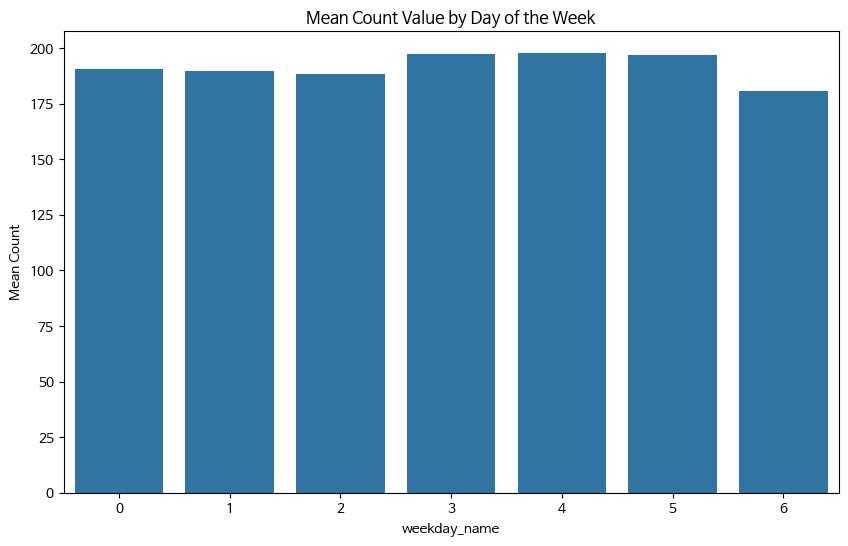

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='day_of_week', y='count', errorbar=None)
plt.title('Mean Count Value by Day of the Week')
plt.xlabel('weekday_name')
plt.ylabel('Mean Count')
plt.show()

#### 2차 모델링

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

# 1) 원-핫 인코딩
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test  = pd.get_dummies(X_test)

# 2) 열 맞추기: train을 기준으로 valid/test를 reindex
X_valid = X_valid.reindex(columns=X_train.columns, fill_value=0)
X_test  = X_test.reindex(columns=X_train.columns, fill_value=0)

# ---- 모델 학습: log1p 타깃 회귀(간단 버전) ----
model = LinearRegression()
model.fit(X_train, np.log1p(y_train))

# ---- 검증셋 예측 ----
y_valid_pred_log = model.predict(X_valid)
y_valid_pred = np.expm1(y_valid_pred_log)      # log1p의 역변환
y_valid_pred = np.maximum(0, y_valid_pred)     # RMSLE를 위해 음수 방지(0으로 클립)

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f"Validation Data RMSLE: {rmsle:.5f}")

# ---- 테스트셋 예측 ----
y_test_pred_log = model.predict(X_test)
y_test_pred = np.expm1(y_test_pred_log)
y_test_pred = np.maximum(0, y_test_pred)       # 0으로 클립 권장 (지금 1로 클립하셨는데 0이 정석)


Validation Data RMSLE: 1.02704


#### 3차 모델링

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)

In [ ]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday_name,weekday_num,year,month,day,hour,humidity_bin,day_of_week
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3,13,16,5,5,2011,1,1,0,High,5
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8,32,40,5,5,2011,1,1,1,High,5
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5,27,32,5,5,2011,1,1,2,High,5
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3,10,13,5,5,2011,1,1,3,High,5
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0,1,1,5,5,2011,1,1,4,High,5


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

# 1) 원-핫 인코딩
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test  = pd.get_dummies(X_test)

# 2) 열 맞추기: train을 기준으로 valid/test를 reindex
X_valid = X_valid.reindex(columns=X_train.columns, fill_value=0)
X_test  = X_test.reindex(columns=X_train.columns, fill_value=0)

# ---- 모델 학습: log1p 타깃 회귀(간단 버전) ----
model = LinearRegression()
model.fit(X_train, np.log1p(y_train))

# ---- 검증셋 예측 ----
y_valid_pred_log = model.predict(X_valid)
y_valid_pred = np.expm1(y_valid_pred_log)      # log1p의 역변환
y_valid_pred = np.maximum(0, y_valid_pred)     # RMSLE를 위해 음수 방지(0으로 클립)

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f"Validation Data RMSLE: {rmsle:.5f}")

# ---- 테스트셋 예측 ----
y_test_pred_log = model.predict(X_test)
y_test_pred = np.expm1(y_test_pred_log)
y_test_pred = np.maximum(0, y_test_pred)       # 0으로 클립 권장 (지금 1로 클립하셨는데 0이 정석)

Validation Data RMSLE: 1.02492


In [ ]:
y_test_pred = model.predict(X_test)
y_test_pred = np.maximum(1, np.expm1(y_test_pred))

# 멘토평
체계적인 분석 프로세스를 보여주며, 특히 분석 목표를 명확히 설정하고 RMSLE에 대한 이해를 잘 보여줍니다. 데이터 전처리에서 windspeed의 이상치를 풍속 강도 기준으로 판단하고 평균값으로 대체하는 등 논리적 접근을 했습니다. EDA에서는 시간대별, 월별, 습도별 분석을 통해 데이터 패턴을 파악했고, 상관관계 히트맵으로 변수 간 관계를 시각화했습니다. 모델링에서는 RandomForest와 LinearRegression을 시도했고 log1p 변환을 적용했으나, 더 다양한 모델 비교와 체계적인 하이퍼파라미터 튜닝이 부족합니다. 코드는 읽기 쉽게 구성되어 있고 적절한 주석이 포함되어 있지만, 모델 성능 개선을 위한 고급 기법들이 제한적입니다.